# Linear Regression

This is a linear regression model using historical Google stock price to make forecast - testing version only

In [9]:
import pandas as pd
import quandl, math
import datetime
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
df = quandl.get('WIKI/GOOGL')
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. High']
df = df[['HL_PCT','Adj. Open','Adj. Close', 'Adj. Volume']]
forecast_col = 'Adj. Close'

In [3]:
#df.fillna(-99999, inplace = True)
forecast_out = int(math.ceil(0.01*len(df)))
print forecast_out
df['label'] = df[forecast_col].shift(-forecast_out)
print df.head(10)
print df.tail(10)

32
              HL_PCT  Adj. Open  Adj. Close  Adj. Volume      label
Date                                                               
2004-08-19  0.077840  50.159839   50.322842   44659000.0  69.399229
2004-08-20  0.078658  50.661387   54.322689   22834300.0  68.752232
2004-08-23  0.039038  55.551482   54.869377   18256100.0  69.639972
2004-08-24  0.071953  55.792225   52.597363   15247300.0  69.078238
2004-08-25  0.038148  52.542193   53.164113    9188600.0  67.839414
2004-08-26  0.030477  52.637487   54.122070    7094800.0  68.912727
2004-08-27  0.026975  54.217364   53.239345    6211700.0  70.668146
2004-08-30  0.032989  52.802998   51.162935    5196700.0  71.219849
2004-08-31  0.014946  51.318415   51.343492    4917800.0  72.278116
2004-09-01  0.032048  51.509003   50.280210    9138200.0  74.810934
              HL_PCT  Adj. Open  Adj. Close  Adj. Volume  label
Date                                                           
2017-03-13  0.007277     860.83      864.58    115164

In [4]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df[:-forecast_out]['label'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
clf = LinearRegression()
clf.fit(X_train, y_train)

#pickle the clf
with open ('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)
print accuracy

0.971529905796


In [6]:
forecast_set = clf.predict(X_lately)
print forecast_out, forecast_set

32 [ 838.33555643  839.07317957  843.34514655  847.66497368  848.79435439
  846.21239346  850.78370573  854.63695195  857.9052213   859.65324907
  859.13004661  856.5164843   857.8858371   853.59668784  864.40583112
  858.79259234  857.82614952  855.79936961  859.3974671   862.37167213
  865.88105456  869.98871427  872.87283286  874.22198819  876.577666
  878.72605921  880.75134903  876.47912984  857.5183642   858.13434262
  847.42233835  843.0362547 ]


In [7]:
df['Forecast']=np.nan
last_date = df.iloc[-1].name
one_day = pd.Timedelta(seconds=86400)
next_unix = last_date + one_day

for i in forecast_set:
    next_date = next_unix
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    next_unix += one_day

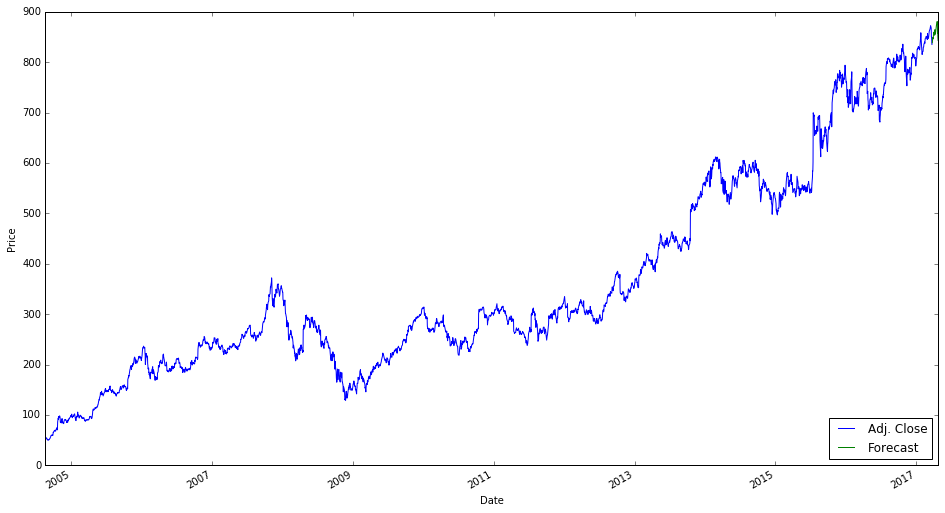

In [8]:
%matplotlib inline
plt.figure(figsize=(16,9))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')